In [1]:
from preproceso import get_processed_data
import pandas as pd

# Obtener datos ya procesados

El proceso de datos se contiene en una sola funciona para facilitar su uso en diversas areas. El detalle de los preprocesos esta en la funcion get_processed_data. 

In [2]:
df,company_dict=get_processed_data()

/home/aferral/PycharmProjects/desafio_globant/preproceso.py:64: DtypeWarning: Columns (1,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(rt)


# 1. == ¿Cómo se distribuyen los datos? ¿Qué te llama la atención o cuál es tu conclusión sobre esto? ==




De revisar los datos hay varias cosas a destacar

## -- Los datos son unicamente de salidas del aeropuerto de santiago -- 

Todos los vuelos son del mismo origen siendo este el aeropuerto de Santiago (Comodoro Arturo Merino Benitez). 

### De esto se tiene que :

* Se quito esa columna ya que en todos los puntos es el mismo valor.
* Hay que tener cuidado con intentar generalizar el modelo o las conclusiones fuera de este aeropuerto. Un modelo entrenado sobre estos datos puede ser inadecuado para aplicar a cualquier aeropuerto en otro lugar del mundo.



## -- Temporalidad de los datos --

Los datos son vuelos entre 01-01-2017 a 01-01-2018 por lo tanto contamos con un año de datos.

Respecto a la cantidad de vuelos se reviso los vuelos por semana para tener una idea de la distribucion.

Si se cuenta por semana se observa que generalmente la cantidad de vuelos crecen entre 16%  = (1400-1200) / (1200) desde la temporada baja a la alta. Tambien hay claros peek al inicio y la mitad del año.


### De esto se tiene que :

* Hay claros peeks de demanda .
* Como se tiene un año de datos va ser dificil generalizar los patrones estacionales. Es decir ¿El comportamiento en junio de 2017 es generalizable a otros años ? Dado los datos actuales no es posible determinarlo.



<AxesSubplot: xlabel='Fecha-I'>

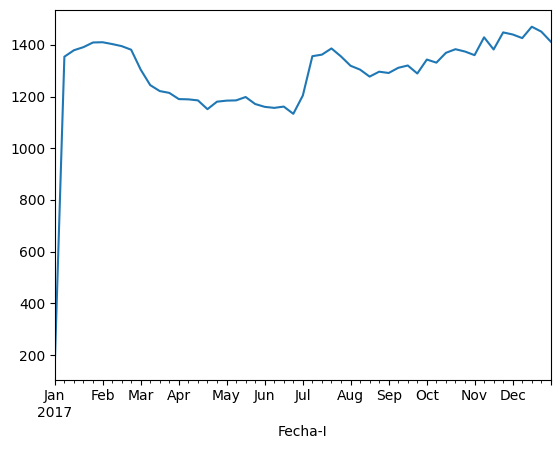

In [3]:
df.groupby(pd.Grouper(key='Fecha-I',freq='W'))['Vlo-I'].count().plot()

# -- Temporada alta --
Revisando la definicion del problema se define temporada alta como 
* Entre 15 dic a 3 mar
* Entre 15 jul a 31 jul
* Entre 11 sept a 30 sep

En los datos de 2017 calza en dic-marzo, pero para julio el peek parece estar en la primera quincena y para el caso de septiembre el peek parece ocurrir en octubre.

Tambien sobre la temporada alta esta concentra el 33% del total de vuelos.


### De esto se tiene que :

* La temporada alta del 2017 no calza del todo con la especificacion dada.


<AxesSubplot: >

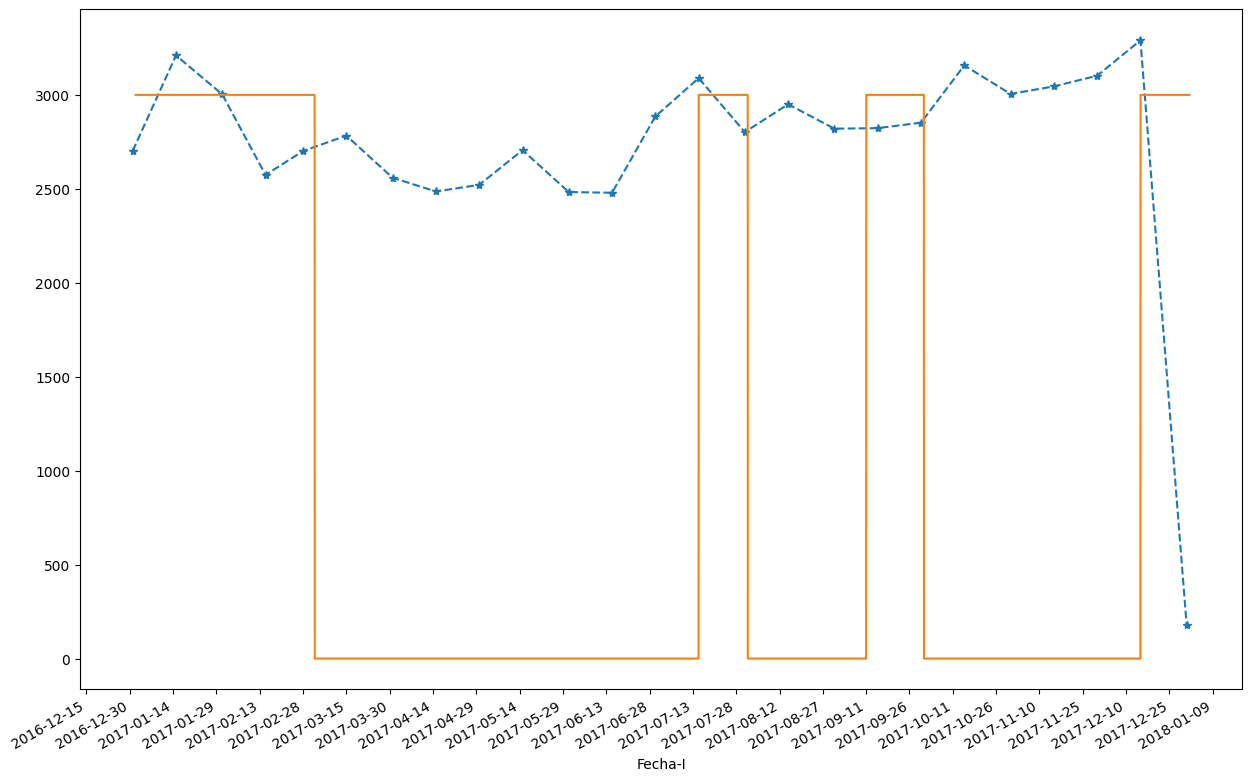

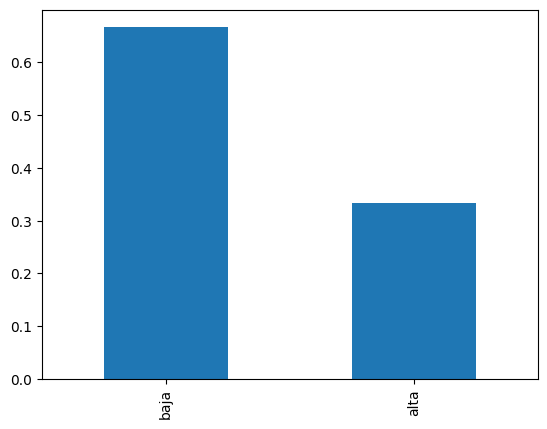

In [4]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
#Si bien el peek de dic-marzo , julio es claro. El otro peek parece ser octubre y no septiembre como sale en temporada alta
ax = df.groupby(pd.Grouper(freq='SM', key='Fecha-I'))['Fecha-I'].count().plot(style='*--',
                                                                              figsize=(15,10))
plt.figure()
ax=(df.set_index('Fecha-I')['temporada_alta']*3000).plot(ax=ax, x='Fecha-I', y='temporada_alta')
ax.xaxis.set_major_locator(mdates.DayLocator(bymonthday=None, interval=15, tz=None))


df['temporada_alta'].value_counts(normalize=True).rename({0:'baja',1:'alta'}).plot.bar()

# -- Vuelos por empresa --

Vuelos muy concentrados entre GRUPO lata y sky (80 % de los vuelos)


### De esto se tiene que :

* Hay que tener cuidado con ajustar variables como promedios a cada aerolinea ciertas aerolineas tienen muy pocos datos para obtener un valor significativo.



<AxesSubplot: >

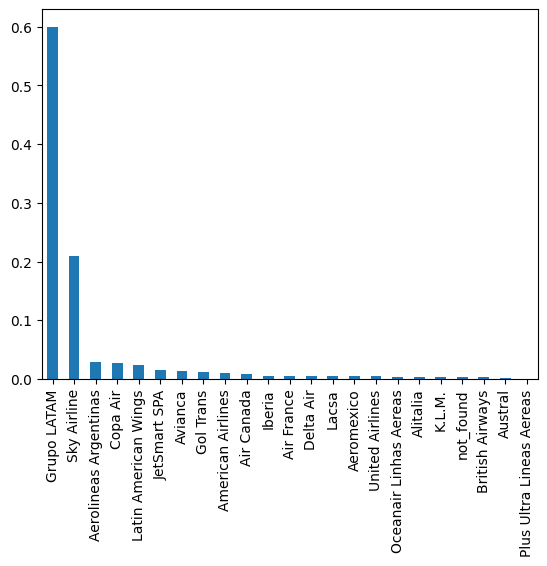

In [5]:
df['Emp-O'].value_counts(normalize=True)
df['emp']=[company_dict.get(x,'not_found') for x in df['Emp-O'].values.tolist()]
df['emp'].value_counts(normalize=True).plot.bar()

# -- Vuelos nacionales vs internacionales --

Ligeramente ams vuelos nacionales 54% vs 45%

Y tambien siguen un patron de demanda similar en el año. Observar el grafico y que la proporcion de vuelos se mantiene mas o menos estable.

### De esto se tiene que :

* En terminos de demanda los vuelos nacionales e internacionales siguen el mismo comportamiento en el año. Con esto me refiero a forma de la curva, en terminos de cantidad los vuelos nacionales son mayores. 


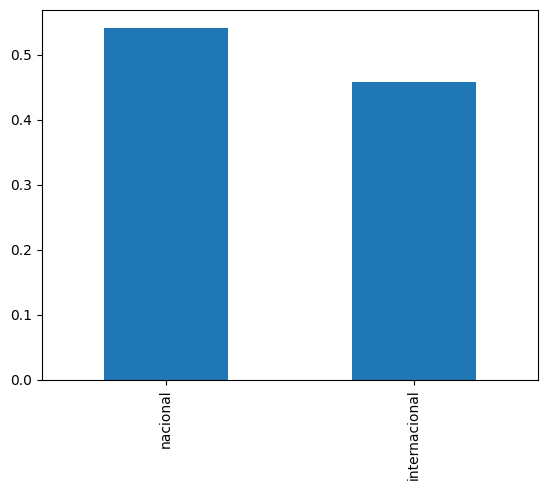

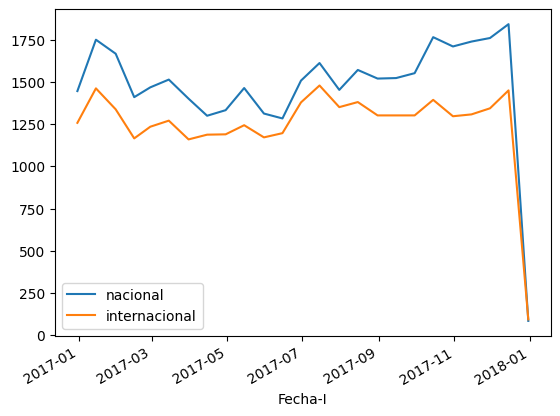

In [6]:
name_dict={0:'nacional',1:'internacional'}
df['TIPOVUELO'].value_counts(normalize=True).rename(name_dict).plot.bar()

key_to_use='TIPOVUELO'
res=df.groupby([pd.Grouper(key='Fecha-I',freq='SM'),key_to_use])['Vlo-I'].count().reset_index()
ax=None
for key,df_key in res.groupby(key_to_use):
    ax=df_key.plot(x='Fecha-I',y='Vlo-I',ax=ax,label=name_dict[key])
plt.show()

In [7]:
key_to_use='TIPOVUELO'
res=df.groupby([pd.Grouper(key='Fecha-I',freq='M'),key_to_use])['Vlo-I'].count().reset_index()
r1=df[df[key_to_use] == 0].groupby([pd.Grouper(key='Fecha-I',freq='M'),key_to_use])['Vlo-I'].count().reset_index()
r2=df[df[key_to_use] == 1].groupby([pd.Grouper(key='Fecha-I',freq='M'),key_to_use])['Vlo-I'].count().reset_index()

z=r1.merge(r2,on='Fecha-I',how='left')
z['ratio']= z['Vlo-I_y'] / z['Vlo-I_x']
z

,Fecha-I,TIPOVUELO_x,Vlo-I_x,TIPOVUELO_y,Vlo-I_y,ratio
0,2017-01-31,0,3303,1,2805,0.849228
1,2017-02-28,0,3062,1,2499,0.816133
2,2017-03-31,0,2986,1,2494,0.835231
3,2017-04-30,0,2666,1,2355,0.883346
4,2017-05-31,0,2812,1,2427,0.863087
5,2017-06-30,0,2608,1,2374,0.910276
6,2017-07-31,0,3127,1,2864,0.915894
7,2017-08-31,0,3025,1,2719,0.898843
8,2017-09-30,0,3005,1,2605,0.866889
9,2017-10-31,0,3345,1,2687,0.803288


# -- Sobre los cambios en planificacion --

Segun los datos hay diversos cambios respecto a las variables I (planeada) y O (Operada). Se distinguen 3 cambios


### De esto se tiene que :

* Los cambios de vuelo y los cambios de destino no son variables utiles. Ya que incluso si fueran predictores perfectos solo son aplicables a un conjunto infimo de puntos.
* El cambio de empresa es comun por lo tanto puede ser una variable a considerar.

In [8]:
n_global=df.shape[0]

# pocas veces cambian de vuelo el numero
n_casos=(df['Vlo-O'] != df['Vlo-I']).sum()
print("Casos: {0} de {1} | {2}".format(n_casos,n_global,n_casos*1.0/n_global))

# Es bastante comun cambiar de empresa (notar que en la mayoria no cambia numeros de vuelo)
n_casos=(df['Emp-O'] != df['Emp-I']).sum()
print("Casos: {0} de {1} | {2}".format(n_casos,n_global,n_casos*1.0/n_global))


# MUy poco comun cambiar destino
n_casos=(df['Des-I'] != df['Des-O']).sum()
print("Casos: {0} de {1} | {2}".format(n_casos,n_global,n_casos*1.0/n_global))


Casos: 120 de 68206 | 0.0017593760079758379
Casos: 18669 de 68206 | 0.273714922440841
Casos: 28 de 68206 | 0.0004105210685276955


# -- Sobre atrasos en general --

* El atraso en minutos es generalmente de 4 minutos. Hay que llegar al percentil 90 para tener un atraso de 15 minutos (eventos raros)


* Aproximadamente el 20% de los vuelos tiene atraso
* Hay claros peeks de atraso que parecen coincidir con peeks de demanda

In [9]:
print(df['dif_min'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]))
df['atraso_15'].value_counts(normalize=True)

0.1    -4.0
0.2    -2.0
0.3     0.0
0.4     2.0
0.5     4.0
0.6     6.0
0.7     9.0
0.8    14.0
0.9    26.0
Name: dif_min, dtype: float64


0    0.81506
1    0.18494
Name: atraso_15, dtype: float64

<AxesSubplot: xlabel='Fecha-I'>

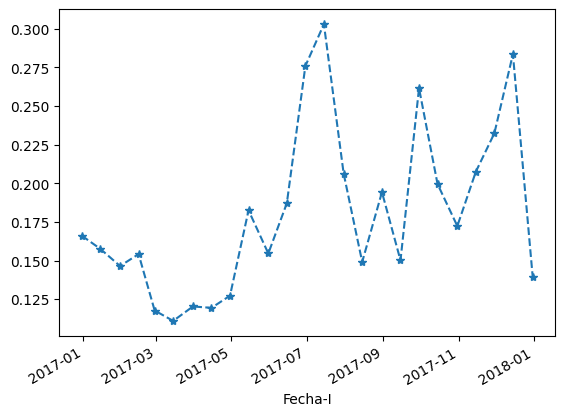

In [10]:
#* el rate de atraso tambien crece en temporada alta
#es entonces importante la demanda del aeropuerto

df.groupby(pd.Grouper(freq='SM',key='Fecha-I'))['atraso_15'].mean().plot(style='*--')


### De esto se tiene que :

* Hay que tener cuidado con desbalance de clases la clase negativa = "no atraso" vs clase positiva = "atraso" esta en relacion 1 es a 4. Esto coloca ciertas consideraciones sobre el entrenamiento.

* Un atraso de 15 minutos es considerable ya que esta sobre el porcentil 80.

* La demanda de vuelos parece influir bastante en atraso ya que cambia de 12% a 30 % segun peeks

# -- Dias de vuelo y periodo_dia --

* Los dias de vuelo mas comunes son viernes y jueves el menos comun sabado
* Los vuelos estan mas o menos equitativos en manana y dia. La noche tiene un poco menos


### De esto se tiene que :

* Hay cierto comportamiento distintivo en la semana el cual tiene peek y valles. Esto da la intuicion de usar alguna clase de variable para diferenciar diversos dias (ejemplo one hot encoding).
* Lo mismo con el periodo del dia.

4    0.150896
3    0.150295
0    0.148535
6    0.143624
2    0.142539
1    0.141659
5    0.122453
Name: DIANOM, dtype: float64


<AxesSubplot: xlabel='DIANOM'>

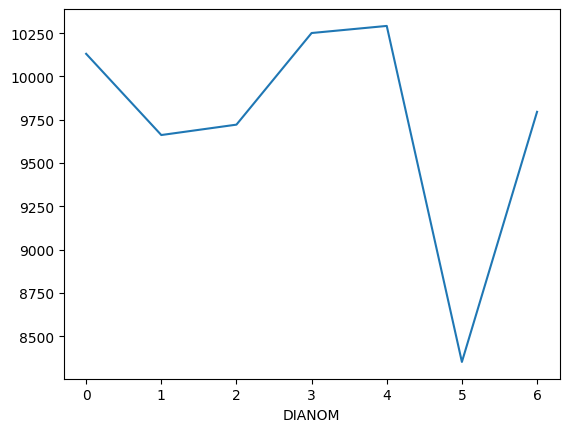

In [11]:
print(df['DIANOM'].value_counts(normalize=True))
df.groupby('DIANOM')['Emp-I'].count().plot()

In [12]:
df['periodo_dia'].value_counts(normalize=True)

1    0.373955
0    0.371698
2    0.254347
Name: periodo_dia, dtype: float64

# -- Otras variables agregadas --

Dado las variables actuales se decidio agregar las siguientes variables: (mayores detalles de calculo en codigo)

* dest_country: Dado el aeropuerto se obtienen los codigos de paises asociados y se aplica one hot encoding.
* dest_dist : Distancia en kilometros al aeropuerto destino.
* rolling_emp_carga : Nivel de cargar de empresa dado los ultimos 30 dias (cantidad de vuelos).
* rolling_dest_carga : Nivel de cargar de aeropuerto destino dado los ultimos 30 dias (cantidad de vuelos).
* x0,x1,x2 : Variables que indican dias modulados por semana, quincena y bloques de 4 meses. La idea es darle pistas de estacionalidad al modelo.

# Otras cosas

In [19]:
#* Esta mal definida el label de OPERA. Opera es realmente el label de la empresa del vuelo programado

aux=pd.read_csv('dataset_SCL.csv')
aux[aux['Emp-O'] == 'AUT'][['Emp-I','Emp-O','OPERA']].drop_duplicates()


/tmp/ipykernel_7090/4189714984.py:3: DtypeWarning: Columns (1,6) have mixed types. Specify dtype option on import or set low_memory=False.
  aux=pd.read_csv('dataset_SCL.csv')


,Emp-I,Emp-O,OPERA
343,AUT,AUT,Austral
11991,ARG,AUT,Aerolineas Argentinas


# 2. == Generar columnas adicionales ==

El codigo para generar las columnas esta comentado en get_processed_data. 

In [20]:
%psource get_processed_data


In [21]:
from preproceso import periodo_dict
# generar archivo con variables solicitadas
df_export=df[['Fecha-I','Fecha-O','temporada_alta','dif_min','atraso_15','periodo_dia']]
df_export['periodo_dia']=[periodo_dict[x] for x in df['periodo_dia'].values.tolist()]
df_export.to_csv('synthetic_features.csv',index=False)

/tmp/ipykernel_7090/1441675126.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_export['periodo_dia']=[periodo_dict[x] for x in df['periodo_dia'].values.tolist()]


# 3. == Como se distribuye la tasa de atraso dado diversas variables ==

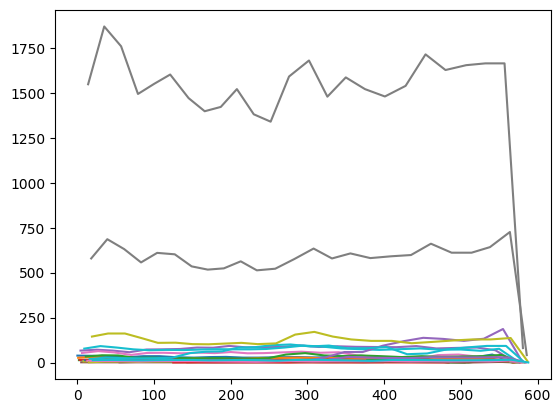

In [22]:
key_to_use = 'Emp-I'
norm = False
res = df.groupby([pd.Grouper(key='Fecha-I', freq='SM'), key_to_use])['Vlo-I'].count().reset_index()
ax = None
for key, df_key in res.groupby(key_to_use):
    fact = df_key['Vlo-I'].iloc[0] if norm else 1
    ax = (df_key['Vlo-I'] / fact).plot(x='Fecha-I', y='Vlo-I', ax=ax, label=key)


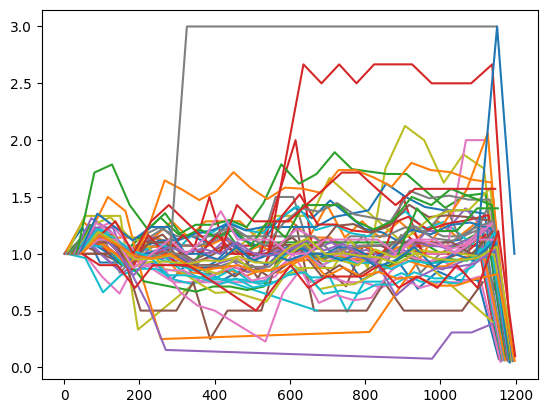

In [23]:
key_to_use = 'Des-I'
norm = True
res = df.groupby([pd.Grouper(key='Fecha-I', freq='SM'), key_to_use])['Vlo-I'].count().reset_index()
ax = None
for key, df_key in res.groupby(key_to_use):
    fact = df_key['Vlo-I'].iloc[0] if norm else 1
    ax = (df_key['Vlo-I'] / fact).clip(-3, 3).plot(x='Fecha-I', y='Vlo-I', ax=ax, label=key)

    

In [24]:
# efecto del destino en atraso TODO algo interesante?
rr = df.groupby('Des-I').agg(n=('atraso_15', 'count'), m=('atraso_15', 'mean'))
rr['enought']=rr['n'] > 100
print(rr[rr.enought]['m'].quantile([0.1 * i for i in range(10)]))

0.0    0.050746
0.1    0.080498
0.2    0.132825
0.3    0.147712
0.4    0.156019
0.5    0.185185
0.6    0.195073
0.7    0.241134
0.8    0.260635
0.9    0.294438
Name: m, dtype: float64


In [25]:
# efecto de empresa en atraso efecto igual importante. del percentil 0.7 es bastante alto
rr = df.groupby('Emp-I').agg(n=('atraso_15', 'count'), m=('atraso_15', 'mean'))
rr['enought']=rr['n'] > 100
print(rr[rr.enought]['m'].quantile([0.1 * i for i in range(10)]))

0.0    0.028490
0.1    0.059064
0.2    0.070630
0.3    0.088493
0.4    0.123767
0.5    0.162847
0.6    0.178456
0.7    0.251112
0.8    0.279051
0.9    0.402698
Name: m, dtype: float64


In [26]:
# efecto de tiempo del dia en atraso
# no mucho, pero en la manana tiene de ser menor atraso
df[['periodo_dia', 'atraso_15']].groupby('periodo_dia').agg(n=('atraso_15', 'count'), m=('atraso_15', 'mean'))

,n,m
periodo_dia,,
0,25352,0.160066
1,25506,0.199404
2,17348,0.200023


In [27]:
# efecto del tipo de viaje en atraso. Efectoi mportante
rr = df.groupby('TIPOVUELO').agg(n=('atraso_15', 'count'), m=('atraso_15', 'mean'))
print(rr)

               n         m
TIPOVUELO                 
0          36966  0.150571
1          31240  0.225608


In [28]:
# efecto del mes en atraso. HAy importancia a periodos de alta actividad veer como sube atraso
rr = df.groupby(pd.Grouper(freq='M', key='Fecha-I')).agg(n=('atraso_15', 'count'), m=('atraso_15', 'mean'))
print(rr)

               n         m
Fecha-I                   
2017-01-31  6108  0.160282
2017-02-28  5561  0.151591
2017-03-31  5480  0.114781
2017-04-30  5021  0.116710
2017-05-31  5239  0.157664
2017-06-30  4982  0.171016
2017-07-31  5991  0.293440
2017-08-31  5744  0.173398
2017-09-30  5610  0.172371
2017-10-31  6032  0.225962
2017-11-30  6081  0.197336
2017-12-31  6357  0.254051


In [29]:
# efecto del dia de la semana. a mayor cantidad de gente sube algo el % de atraso.
rr = df.groupby(pd.Grouper(freq='M', key='Fecha-I')).agg(n=('atraso_15', 'count'), m=('atraso_15', 'mean'))
print(rr)

               n         m
Fecha-I                   
2017-01-31  6108  0.160282
2017-02-28  5561  0.151591
2017-03-31  5480  0.114781
2017-04-30  5021  0.116710
2017-05-31  5239  0.157664
2017-06-30  4982  0.171016
2017-07-31  5991  0.293440
2017-08-31  5744  0.173398
2017-09-30  5610  0.172371
2017-10-31  6032  0.225962
2017-11-30  6081  0.197336
2017-12-31  6357  0.254051


In [30]:
# efecto de temporada. Ligereamente mas alta segun temporada alta o no
rr = df.groupby('temporada_alta').agg(n=('atraso_15', 'count'), m=('atraso_15', 'mean'))
print(rr)

                    n        m
temporada_alta                
0               45444  0.17921
1               22762  0.19638


# 4. == Entrenar modelos para obtener probabilidad de atraso ==


In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import TimeSeriesSplit,KFold
import random
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from preproceso import RELEVANT_COUNTRIES, get_processed_data
from utils_eval import evaluate_predicted_df, plot_roc, get_metric_and_best_threshold_from_roc_curve

# Como separar entrenamiento y validacion

Dado que los datos son series de tiempo hay que tener cuidado en como separar entrenamiento y validacion.
Los datos no son independientes entre si por lo que de separar de forma aleatoria el modelo podria tener cierta ventaja o ser la evaluacion muy poco realista. Los puntos cercanos en el tiempo contienen mucha informacion comun por lo tanto dan mucha informacion sobre el set de validacion lo que implicaria sobre ajustar el modelo. Tambien se puede pensar como que en la realidad el modelo no va tener puntos de comparacion tan cercanos en el tiempo al estar en operacion.

Dado eso se utiliza los primeros X meses como entrenamiento y el resto como test.

Esto lamentablemente dificulta encontrar patrones estacionales (ya que hay ciertos meses que no aparecen en entrenamiento)


In [32]:
"""
https://stats.stackexchange.com/questions/14099/using-k-fold-cross-validation-for-time-series-model-selection
http://francescopochetti.com/pythonic-cross-validation-time-series-pandas-scikit-learn/
"""
tscv = TimeSeriesSplit(n_splits=3)


# Baseline modelo aleatorio

Es importante tener un modelo de prueba para tener una idea de las metricas. De nada sirve obtener metricas sin conocer que tan buenas son en relacion a un modelo simple.

En este caso el modelo mas simple interesante es un modelo que genere de forma aleatoria si se retraso o no. Pero con una probabilidad igual al atraso en el general de los datos. Como solo el 20% de los vuelos tienen atraso el modelo genera solo el 20% de las veces label atraso.

El resto de las metricas se detallara mas abajo, pero de momento es importante que logra 20% de precision en atraso y 20 % recall con 69% de exactitud en el general.

In [33]:
# evaluacion de modelo random para tener commparativa (no se usa train-test split 
# ya que el modelo es literalmente ignorante de los datos)
df['y_score']=[random.random() for x in df['id'].values.tolist()]
df['y_pred']=df['y_score']>0.8
evaluate_predicted_df(df,'random_model')
df.drop(['y_score','y_pred'],axis=1);

=========== model: random_model ==============
              precision    recall  f1-score   support

         oka       0.81      0.80      0.81     55592
      atraso       0.18      0.20      0.19     12614

    accuracy                           0.69     68206
   macro avg       0.50      0.50      0.50     68206
weighted avg       0.70      0.69      0.69     68206

ROC area 0.49647532534655364


# Codigo de entrenamiento y evaluacion

Dado que el codigo de entrenamiento y evaluacion deben ejecutarse a la vez voy a explicar primero la parte del entrenamiento y en la pregunta siguiente la parte de la evaluacion y las metricas.

En terminos generales se ejecutan varios entrenamiento (al estilo k folds) para tener una robusta estimacion de las metricas en validacion. Como se menciono antes se va usar los primeros X meses de entrenamiento el resto para validacion. En este caso se hacen 3 folds con cantidades cada vez mayores de meses en entrenamiento.

Ej: (puede no ser exactamente con estos meses, pero esta es la idea)

* fold 1 : entrenamiento = [enero,febrero,marzo]  validacion = [abril en adelante]
* fold 2 : entrenamiento = [enero,febrero,marzo,abril,mayo]  validacion = [junio en adelante]
* fold 3 : entrenamiento = [enero,febrero,marzo,abril,mayo,junio,julio]  validacion = [agosto en adelante]

sobre la variables ya se detallo en las secciones anteriores.

El clasificador a utilizar fue un RandomForest. Principalmente los arboles permiten mezclar variables de distintas escalas facilmente y al ser una coleccion de muchos pequeños modelos (arboles de decision) dan las ventajas de un ensemble de forma eficiente.

Tambien en general obtenia metricas mas altas que los otros modelos usados (Knn, Logistic Regression)

Sobre las metricas se detalla en la seccion siguiente.

Despues de iterar 3 veces se sacan promedios de las metricas relevantes (f1 y ROC area) y se obtiene en un solo escalar el performance de modelo. Esto es clave ya que para probar muchos modelos y muchas combinaciones de variables se hace complejo comparar diversas metricas.

In [50]:
def train_loop(force_th=None):
    plot=False
    indexs_to_use=df['id'].values.tolist()
    global_results=[]

    for i, (train_index, test_index) in enumerate(tscv.split(indexs_to_use)):
        print(f"Fold {i}:")

        df_train=df.iloc[train_index]
        df_test=df.iloc[test_index]

        FEATURES=[
            'TIPOVUELO',
                  'periodo_dia',

                  'cambio_empresa',

                  'calidad_dia',
                  'calidad_year_dia',

                  'x0',
                  'x1',
                  'x2',

                  'rolling_emp_carga',
                  'rolling_dest_carga',

            'dest_dist'
                  ]
        FEATURES=FEATURES+['dia_{0}'.format(i) for i in range(7)]
        FEATURES=FEATURES+RELEVANT_COUNTRIES


        TARGET_COL='atraso_15'

        x_train,y_train=df_train[FEATURES].values,df_train[TARGET_COL].astype(int).values
        x_val,y_val=df_test[FEATURES].values,df_test[TARGET_COL].astype(int).values

        clf = LogisticRegression()
        clf= KNeighborsClassifier(n_neighbors=2, algorithm='ball_tree')
        clf = RandomForestClassifier(max_depth=None, random_state=0)
        clf.fit(x_train, y_train)

        df_train['y_score']=clf.predict_proba(x_train)[:,1]

        best_score, TH_TO_USE=get_metric_and_best_threshold_from_roc_curve(y_train, df_train['y_score'].values,
                                                                           calc='f1_pos')
        TH_TO_USE= TH_TO_USE if force_th is None else force_th

        df_test=df_test.assign(y_score=clf.predict_proba(x_val)[:,1])
        df_test=df_test.assign(y_pred=df_test['y_score']>=TH_TO_USE)
        print("Pred distribution: {0}".format(df_test.y_pred.value_counts().to_dict()))
        roc_area,f1_val=evaluate_predicted_df(df_test,'logistic regressor',plot=plot)

        row={'roc_area':roc_area,'f1_mean':f1_val}
        global_results.append(row)

    df_full=pd.DataFrame(global_results)
    print(df_full)
    print(df_full['f1_mean'].mean())

In [51]:
train_loop(force_th=None)

Fold 0:


/tmp/ipykernel_7090/637171277.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['y_score']=clf.predict_proba(x_train)[:,1]
/home/aferral/PycharmProjects/desafio_globant/utils_eval.py:61: RuntimeWarning: invalid value encountered in divide
  precision_pos = (tp) * 1.0 / (tp + fp)


Threshold 0.37383333333333324 maximizando f1_pos con valor 0.7246492936003823
Pred distribution: {False: 16176, True: 875}
=========== model: logistic regressor ==============
              precision    recall  f1-score   support

         oka       0.85      0.96      0.90     14418
      atraso       0.29      0.10      0.14      2633

    accuracy                           0.82     17051
   macro avg       0.57      0.53      0.52     17051
weighted avg       0.77      0.82      0.78     17051

ROC area 0.6063651630339064
Fold 1:


/tmp/ipykernel_7090/637171277.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['y_score']=clf.predict_proba(x_train)[:,1]
/home/aferral/PycharmProjects/desafio_globant/utils_eval.py:61: RuntimeWarning: invalid value encountered in divide
  precision_pos = (tp) * 1.0 / (tp + fp)


Threshold 0.37288095238095237 maximizando f1_pos con valor 0.7275294067755582
Pred distribution: {False: 14671, True: 2380}
=========== model: logistic regressor ==============
              precision    recall  f1-score   support

         oka       0.79      0.88      0.83     13240
      atraso       0.33      0.21      0.26      3811

    accuracy                           0.73     17051
   macro avg       0.56      0.54      0.55     17051
weighted avg       0.69      0.73      0.71     17051

ROC area 0.5887099257912182
Fold 2:


/tmp/ipykernel_7090/637171277.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['y_score']=clf.predict_proba(x_train)[:,1]
/home/aferral/PycharmProjects/desafio_globant/utils_eval.py:61: RuntimeWarning: invalid value encountered in divide
  precision_pos = (tp) * 1.0 / (tp + fp)


Threshold 0.3758459595959595 maximizando f1_pos con valor 0.7412847893097648
Pred distribution: {False: 13571, True: 3480}
=========== model: logistic regressor ==============
              precision    recall  f1-score   support

         oka       0.80      0.82      0.81     13313
      atraso       0.31      0.29      0.30      3738

    accuracy                           0.70     17051
   macro avg       0.56      0.55      0.55     17051
weighted avg       0.70      0.70      0.70     17051

ROC area 0.5858069792388448
   roc_area   f1_mean
0  0.606365  0.522423
1  0.588710  0.545003
2  0.585807  0.554852
0.5407594539651261


# 5. Evaluar modelo

Sobre la evaluacion del modelo primero fue necesario eleguir una metrica a optimizar.

Para esto hay que tener alguna idea de que problema de fondo se busca resolver. En este caso no hay tanto contexto del problema detras, pero se intuye que los atrasos de los vuelos son costosos y se quiere de alguna forma realizar una accion preventiva dado la prediccion del modelo.

Dado esto hay que descartar la exactitud (accuracy) ya que de maximizarla estamos dando mucho peso a la clase "sin_atraso" y vamos a perder muchos casos de atraso. A modo de ejemplo podria colocar como prediccion todos los puntos como "sin atraso" y obtener una exactitud del 81% (ya que 81% de las veces no hay atrasos).

Una idea podria ser utilizar precision de la clase "atraso" lo que entregaria predicciones muy certeras, pero podria ser un modelo muy conservador perdiendo varios "atrasos" en casos no tan seguros (es decir bajo recall).

De la misma forma si intento recuperar todos los "atrasos" quedo con baja precision.

Una idea seria balancear estas dos metricas y eso es exactamente lo que hace la metrica f1

$$
{\displaystyle F_{1}={\frac {2}{\mathrm {recall} ^{-1}+\mathrm {precision} ^{-1}}}=2{\frac {\mathrm {precision} \cdot \mathrm {recall} }{\mathrm {precision} +\mathrm {recall} }}={\frac {2\mathrm {tp} }{2\mathrm {tp} +\mathrm {fp} +\mathrm {fn} }}}
$$

En la cual se toma la media geometrica de ambas.

Otra alternativa interesante podria ser genera una matriz de costos donde se detalla cuanto cuesta un falso positivo y cuando cuesta un falso negativo. Dado estos costos se puede definir una metrica que se ajuste a la especificacion del problema. Pero dado la informacion que manejo me parecio razonable usar F1 para balancear precision y recall.

Otra idea de metrica podria ser ROC area la cual tiene la ventaja de no depender de un punto de corte, pero prefiero F1 ya que de todas formas se requiere un criterio para definir el punto de corte al operar el modelo.


# Como obtener punto de corte

Un punto no menor es que las metricas que mencionaba antes requieren un punto de corte. Los modelos generalmente entregan un score a cada punto, el cual hay que transformar en una variables binaria segun un punto de corte.

La forma de obtener este punto de corte es probar muchos puntos de cortes y quedarse con el de mayor metrica (F1 en este caso). Afortunadamente hay funciones en sklearn que permiten generar gran cantidad de puntos de cortes y sus matrices de confusion asociadas. Dado estas solamente resta aplicar la metrica eleguida. La implementacion se muestra acontinuacion.

Notar que es posible definir cualquier tipo de funcion sobre la matriz de confusion lo que abre la puerta a definir cortes dado una funcion de coste ajustada al problema a resolver.

Un detalle importante es definir este corte sobre los datos de entrenamiento ya que los datos de validacion son solo para evaluar.

In [35]:
%psource get_metric_and_best_threshold_from_roc_curve

# Resultados

Dado las variables y el modelo entrenado se logra un f1 promedio de 0.54 y una area sobre ROC de 0.59 lo cual es 20% superior al modeo aleatorio (en terminos de ROC area sube 0.5 a 0.59). Lo cual es una mejora ligera.

Se puede obtener cierta ganancia en prediccion de positivos si podemos pagar con más falsos positivos (puntos que se colocaron como atraso cuando eran no_atraso). Ejemplo si bajamos el TH

Terminamos con mejores metricas de precision y recall para clase Atraso. Un f1 positivo de 0.33 (que es mayor a 0.23 del modelo sin cambios y mayor que el 0.2 del modelo aleatorio)

Pero a cambio tenemos que bajar algo la precision y recall de la clase "no_atraso". Que tan conveniente es este tradeoff va depender de los costes asociados a falsos positivos o falsos negativos.


In [55]:
train_loop(force_th=0.23)

Fold 0:


/tmp/ipykernel_7090/637171277.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['y_score']=clf.predict_proba(x_train)[:,1]
/home/aferral/PycharmProjects/desafio_globant/utils_eval.py:61: RuntimeWarning: invalid value encountered in divide
  precision_pos = (tp) * 1.0 / (tp + fp)


Threshold 0.37383333333333324 maximizando f1_pos con valor 0.7246492936003823
Pred distribution: {False: 13154, True: 3897}
=========== model: logistic regressor ==============
              precision    recall  f1-score   support

         oka       0.87      0.79      0.83     14418
      atraso       0.23      0.34      0.27      2633

    accuracy                           0.72     17051
   macro avg       0.55      0.56      0.55     17051
weighted avg       0.77      0.72      0.74     17051

ROC area 0.6063651630339064
Fold 1:


/tmp/ipykernel_7090/637171277.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['y_score']=clf.predict_proba(x_train)[:,1]
/home/aferral/PycharmProjects/desafio_globant/utils_eval.py:61: RuntimeWarning: invalid value encountered in divide
  precision_pos = (tp) * 1.0 / (tp + fp)


Threshold 0.37288095238095237 maximizando f1_pos con valor 0.7275294067755582
Pred distribution: {False: 10172, True: 6879}
=========== model: logistic regressor ==============
              precision    recall  f1-score   support

         oka       0.82      0.63      0.71     13240
      atraso       0.28      0.51      0.36      3811

    accuracy                           0.60     17051
   macro avg       0.55      0.57      0.54     17051
weighted avg       0.70      0.60      0.63     17051

ROC area 0.5887099257912182
Fold 2:


/tmp/ipykernel_7090/637171277.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['y_score']=clf.predict_proba(x_train)[:,1]
/home/aferral/PycharmProjects/desafio_globant/utils_eval.py:61: RuntimeWarning: invalid value encountered in divide
  precision_pos = (tp) * 1.0 / (tp + fp)


Threshold 0.3758459595959595 maximizando f1_pos con valor 0.7412847893097648
Pred distribution: {False: 8809, True: 8242}
=========== model: logistic regressor ==============
              precision    recall  f1-score   support

         oka       0.82      0.54      0.65     13313
      atraso       0.26      0.58      0.36      3738

    accuracy                           0.55     17051
   macro avg       0.54      0.56      0.51     17051
weighted avg       0.70      0.55      0.59     17051

ROC area 0.5858069792388448
   roc_area   f1_mean
0  0.606365  0.549967
1  0.588710  0.535495
2  0.585807  0.508456
0.5313058994929599


# Resultados en general y posibles mejoras

* Se observa una gran caida en las metricas entre entrenamiento y validacion. Lo que indica que dado los datos es dificil generalizar.

* En general las metricas del modelo no difieren de forma considerable del modelo aleatorio. Estan 8% arriba en ROC area y 4% arriba en f1 promedio. Esto indica que las variables y el modelo aun no logran una forma robusta de predecir atraso.

* Creo que podria ser util obtener alguna razon o categoria para los atrasos. Mas que nada conocer más del problema. Actualmente es muy abstracto entender el porque se atrasan los vuelos dados los datos obtenidos.


* En general se tiene que a mayor demanda de vuelos mayor es la probabilidad de atraso.


* Es importante definir que tanto cuesta un positivo y un negativo. Ya que dependiendo de esto que clase de modelo buscamos. Por ejemplo de soportar mayores falsos positivos (es decir decir que un vuelo se atrasa cuando realmente no se atrasara) lleva a subidas de hasta 10 puntos en metricas de f1 promedio (Ver como metricas de f1 atraso suben, a cambio de bajar algo metricas de f1 de "no atraso" )

* Hay varias variables que dependen de tener los datos al dia de la prediccion. Eso significa que solo se conocera probabilidad de atraso con menos de un dia de anticipacion. Dependiendo de la posible aplicacion eso puede o no ser un problema.
